In [56]:
# Use PyTorch to build neural networkabs
# Inspired by pytorch workshop conducted in MSBD 5001 course

# Import required packages
import os
import numpy as np
import pandas as pd
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToPILImage
from torch.nn.init import kaiming_uniform_
import matplotlib.pyplot as plt

In [57]:
# Import the yield data as pandas data frame (Note this is saved as a csv file in base working directory)
file_path = os.path.join(os.getcwd()) + '/'
file_name = 'Crop_Yields.csv'
yield_data = pd.read_csv(file_path + file_name)

In [58]:
# Create class to load dataset

class CustomImageDataset():
    def __init__(self, hist_dir, crop_yield_table, transform=None, target_transform=None):  
        self.hist_dir = hist_dir # References the directory for each given country where the data is stored
        self.transform = transform
        self.target_transform = target_transform
        # load the files 
        filenames = [] # For every year, yields a numpy array of dimension 576 x 29
        crop_yields = []
        for filename in os.listdir(hist_dir):
            filenames.append(filename)
            crop_yields.append(crop_yield_table[crop_yield_table.Year == int(filename[-8:-4])]['Cereal Yield'].values[0])
        self.filenames = filenames
        self.crop_yields =crop_yields
        
    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        hist_dir = os.path.join(self.hist_dir, self.filenames[idx])
        #hist = torch.from_numpy(np.load(hist_dir)).float()
        hist = np.load(hist_dir)
        if self.transform:
            hist = self.transform(hist).float()
        crop_yield = torch.from_numpy(self.crop_yields[idx].reshape(-1, 1)).float()
        return hist, crop_yield

In [59]:
from torchvision.transforms import Resize, ToTensor, Compose

# crop_dataset = CustomImageDataset("./kenya", crop_yield_table = yield_data, transform = ToTensor())
crop_dataset = CustomImageDataset("./kenya", crop_yield_table = yield_data, transform = Compose([ToTensor(), Resize((28,28))]))

# print(dataset.filenames)
# print(dataset.crop_yields)
# dataset[3]

In [60]:
crop_dataset[3] # Shows for a given tensor which consists of a pair of 1) array of binned histogram data; and 2) yield output

(tensor([[[9.2558e-03, 1.3343e-03, 3.7762e-04, 3.8769e-03, 3.7510e-03,
           1.2839e-02, 0.0000e+00, 3.7762e-04, 9.8181e-04, 0.0000e+00,
           0.0000e+00, 2.7021e-03, 3.6419e-03, 4.9846e-03, 7.6615e-03,
           5.1692e-03, 2.9538e-03, 6.4027e-03, 3.1888e-03, 0.0000e+00,
           2.0643e-03, 4.6237e-03, 1.0154e-03, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
           0.0000e+00, 0.0000e+00, 0.0000e+00, 0.000

In [61]:
crop_dataset[3][0].dtype

torch.float32

In [62]:
crop_dataset[3][1].dtype

torch.float32

In [63]:
crop_dataset[3][0].shape # For each binned histogram data, consists of 576 observations across 29 dimensions

torch.Size([1, 28, 28])

type of the image:  <class 'torch.Tensor'>
Yield: tensor([[1.2400]])


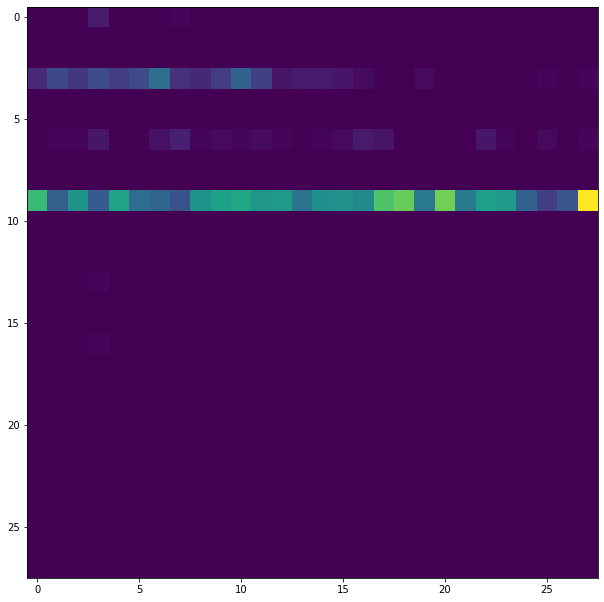

In [64]:
# Plot data for one sample pair
raw_image, crop_yield = crop_dataset[0]
figure = plt.figure()
figure.set_size_inches(18.5, 10.5)

print("type of the image: ", type(raw_image))

if type(raw_image) == torch.Tensor:
    plt.imshow(ToPILImage()(raw_image))
else:
    plt.imshow(raw_image)
    
print(f"Yield: {crop_yield}")

In [65]:
raw_image.shape

torch.Size([1, 28, 28])

In [66]:
# Now moving on to the machine learning model

In [67]:
dataloader = DataLoader(crop_dataset, batch_size=1, shuffle=False)

In [68]:
for feature, label in dataloader:
    print(f"Feature batch shape: {feature.size()}")
    print(label)
    print(f"Feature data type: {feature.dtype}")
    print(f"Label data type: {label.dtype}")

Feature batch shape: torch.Size([1, 1, 28, 28])
tensor([[[1.2400]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 1, 28, 28])
tensor([[[1.7100]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 1, 28, 28])
tensor([[[1.5100]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 1, 28, 28])
tensor([[[1.7400]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 1, 28, 28])
tensor([[[1.6600]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 1, 28, 28])
tensor([[[1.5800]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 1, 28, 28])
tensor([[[1.7700]]])
Feature data type: torch.float32
Label data type: torch.float32
Feature batch shape: torch.Size([1, 1, 28, 28])
tensor([[[1.3800]]])


In [69]:
# Check device used
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [70]:
# Basic Neural Network as outlined in lecture notes
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        #self.linear1 = nn.Linear(28*28, 512)
        #self.linear2 = nn.Linear(512, 512)
        #self.linear3 = nn.Linear(512, 10)
        #self.relu = nn.ReLU()
        
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        #x = self.linear1(x)
        #x = self.relu(x)
        #x = self.linear2(x)
        #x = self.relu(x)
        #logits = self.linear3(x)
        logits = self.linear_relu_stack(x)
        return logits

In [71]:
# # Get cpu or gpu device for training.
# device = "cuda" if torch.cuda.is_available() else "cpu"
# print(f"Using {device} device")

    
# # Convolution Neural Network as outlined in lecture notes
# class ConvNN(nn.Module):
#     def __init__(self):
#         super(ConvNN, self).__init__()
#         self.conv_stack = nn.Sequential(
#             nn.Conv2d(1,6,5),
#             nn.ReLU(),
#             nn.MaxPool2d(2),
#             nn.Conv2d(6,12,5),
#             nn.ReLU(),
#             nn.MaxPool2d(2),
#             nn.Flatten(),
#             nn.ReLU(),
#             nn.Linear(192, 512),
#             nn.ReLU(),
#             nn.Linear(512, 3)
#         )

#     def forward(self, x):
#         logits = self.conv_stack(x)
#         return logits
    

# conv_model = ConvNN().to(device)
# print(conv_model)

In [72]:
model = NeuralNetwork().to(device)
trainloader = dataloader # train_dataloader_resnet
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-4)
print(model)
print(model(crop_dataset[3][0].to(device)))

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=1, bias=True)
  )
)
tensor([[0.0288]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [73]:
# Train model
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.train()
    correct, train_loss = 0, 0 
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        train_loss += loss.item()
        print(f"Actual {y}")
        print(f"Predicted {pred}")

        # Backpropagation
        optimizer.zero_grad()  
        loss.backward()
        optimizer.step() 
    train_loss /= num_batches
    return train_loss 

In [74]:
epochs = 500
for t in range(epochs):
    train_loss = train(trainloader, model, loss_fn, optimizer)
    # test_loss, test_acc = test(testloader, model, loss_fn)
    if t%1 == 0:
        print(f"Epoch {t}:")
        print(f"Avg loss: {train_loss:>8f}")
print("Done!")

Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[0.0217]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[0.1061]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[0.1597]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[0.2701]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[0.3340]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[0.4130]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[0.4668]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[0.5598]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[

Predicted tensor([[1.4541]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.5353]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.3843]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.8464]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6564]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.6736]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.6172]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.5997]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6053]], device='cuda:0', grad_fn=<AddmmBack

Predicted tensor([[1.6200]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.6753]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.5879]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6040]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.7010]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 18:
Avg loss: 0.013571
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.3957]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.5511]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.4152]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.8260]], device

Predicted tensor([[1.5680]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.4382]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.8014]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6429]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5850]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7215]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.5675]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6069]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.7477]], device='cuda:0', grad_fn=<AddmmBack

Predicted tensor([[1.7738]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 35:
Avg loss: 0.005264
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.3152]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.5924]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.4618]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7712]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6456]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5693]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7533]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.5366]], device

Predicted tensor([[1.7692]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.5013]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6281]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.7903]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 44:
Avg loss: 0.002729
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2845]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6206]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.4804]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7461]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6518]], device

Predicted tensor([[1.7347]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6535]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5683]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7741]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.4554]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6406]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8027]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 54:
Avg loss: 0.001050
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2622]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6543]], device

Predicted tensor([[1.2521]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6821]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.4983]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7338]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6538]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5688]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7694]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.4180]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6445]], device='cuda:0', grad_fn=<AddmmBack

Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5701]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7665]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3921]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6414]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8154]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 73:
Avg loss: 0.000063
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2486]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7039]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5039]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device=

Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7191]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5051]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7365]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6578]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5704]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7586]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3873]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6296]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[

Predicted tensor([[1.2440]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7193]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5128]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7468]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6553]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5755]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7491]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3919]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6171]], device='cuda:0', grad_fn=<AddmmBack

Epoch 99:
Avg loss: 0.002117
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.3071]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6854]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5330]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7452]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6553]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5969]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7381]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3974]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device=

Predicted tensor([[1.7793]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 107:
Avg loss: 0.000487
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2726]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6853]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5507]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7141]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.7042]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5244]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.8444]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.2986]], devic

Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3461]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6245]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8264]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 117:
Avg loss: 0.000826
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.1972]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7455]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.4651]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7756]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6144]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device

Predicted tensor([[1.7695]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6196]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.6443]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7008]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.4426]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6094]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8083]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 127:
Avg loss: 0.002043
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2437]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6845]], devic

Predicted tensor([[1.6655]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5412]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7021]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.7086]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5207]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.8472]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3276]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6545]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8044]], device='cuda:0', grad_fn=<AddmmBack

Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.4069]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6197]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8260]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 144:
Avg loss: 0.000176
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2302]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7095]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5049]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7352]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6588]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device

Predicted tensor([[1.6325]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8196]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 152:
Avg loss: 0.000044
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2323]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7191]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.4992]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7428]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6485]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5814]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7611]], devic

Predicted tensor([[1.3892]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6360]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8021]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 162:
Avg loss: 0.000064
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2615]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6969]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5281]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7267]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6750]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5566]], devic

Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2797]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7004]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5235]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7304]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6727]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5660]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7795]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3639]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[

Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.1932]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7292]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5037]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7565]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6392]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5988]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7489]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3815]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[

Predicted tensor([[1.5195]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7384]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6762]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5462]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.8153]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3350]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6560]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.7660]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 191:
Avg loss: 0.000903
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2773]], devic

Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5326]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7278]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6790]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5651]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7955]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3530]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6533]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.7788]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 200:
Avg loss: 0.000565
Actual tensor([[[1.2400]]], device

Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3654]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6203]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8301]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 209:
Avg loss: 0.000454
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2121]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7243]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.4849]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7493]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6492]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device

Predicted tensor([[1.5966]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7647]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3836]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6490]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.7832]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 219:
Avg loss: 0.000431
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2630]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6965]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5209]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7239]], devic

Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.4222]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6035]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8432]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 227:
Avg loss: 0.000809
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2211]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7017]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5197]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7269]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6794]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device

Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7253]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6712]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5586]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7964]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3498]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6480]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8128]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 237:
Avg loss: 0.000610
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2309]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device

Predicted tensor([[1.4052]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.5969]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8548]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 246:
Avg loss: 0.000518
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2043]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7270]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5002]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7487]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6446]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5950]], devic

Predicted tensor([[1.5654]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7881]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3504]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6552]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.7745]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 256:
Avg loss: 0.000390
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2742]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6984]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5285]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7296]], devic

Predicted tensor([[1.6128]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8150]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 264:
Avg loss: 0.000447
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2473]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6952]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5325]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7273]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6855]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5510]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7951]], devic

Predicted tensor([[1.3439]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6366]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8123]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 274:
Avg loss: 0.000596
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2211]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7329]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.4822]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7595]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6383]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.6139]], devic

Predicted tensor([[1.1982]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7246]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.4939]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7542]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6404]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.6076]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7434]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.4052]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6253]], device='cuda:0', grad_fn=<AddmmBack

Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6628]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5618]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.8030]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3489]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6615]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.7700]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 293:
Avg loss: 0.000643
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2725]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6921]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device

Predicted tensor([[1.8135]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 301:
Avg loss: 0.000434
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2509]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6896]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5241]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7233]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6823]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5573]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7910]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3647]], devic

Predicted tensor([[1.7264]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6702]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5644]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7942]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3631]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6316]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8288]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 311:
Avg loss: 0.000415
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2118]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7353]], devic

Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.5899]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8593]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 320:
Avg loss: 0.000864
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.1994]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7213]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5044]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7461]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6477]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5847]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device

Predicted tensor([[1.7345]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.4020]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6222]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8235]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 329:
Avg loss: 0.000486
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2303]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7110]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5180]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7359]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6683]], devic

Predicted tensor([[1.5560]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7856]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3631]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6367]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8014]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 339:
Avg loss: 0.000355
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2523]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7110]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5049]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7479]], devic

Predicted tensor([[1.3731]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6214]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8279]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 348:
Avg loss: 0.000246
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2112]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7349]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.4880]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7587]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6365]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.6040]], devic

Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6431]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.7941]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 356:
Avg loss: 0.000691
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2472]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7145]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5025]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7481]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6525]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5999]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device

Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2158]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7058]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5180]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7348]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6756]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5639]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7817]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3719]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[

Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2609]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6922]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5252]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7278]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6769]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5534]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.8182]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3266]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[

Predicted tensor([[1.7862]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3820]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6152]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8320]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 382:
Avg loss: 0.000406
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2177]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7201]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.4924]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7478]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6466]], devic

Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3737]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6507]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.7844]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 392:
Avg loss: 0.000370
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2625]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6996]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5222]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7269]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6771]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device

Predicted tensor([[1.7926]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3638]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6494]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.7810]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 401:
Avg loss: 0.000412
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2803]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6859]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5261]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7271]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6740]], devic

Predicted tensor([[1.7424]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3952]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6170]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8432]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 411:
Avg loss: 0.000457
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2004]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7335]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.4920]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7496]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6505]], devic

Predicted tensor([[1.5554]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7803]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3745]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6382]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.7802]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 421:
Avg loss: 0.000291
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2862]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6837]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5331]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7295]], devic

Predicted tensor([[1.2568]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7208]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.4982]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7551]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6376]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5971]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7649]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3776]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6198]], device='cuda:0', grad_fn=<AddmmBack

Predicted tensor([[1.2240]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6974]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5237]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7325]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6743]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5791]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7534]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3967]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6316]], device='cuda:0', grad_fn=<AddmmBack

Predicted tensor([[1.5756]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.8066]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3252]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6718]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.7702]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 450:
Avg loss: 0.000790
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2580]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7174]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.4989]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7436]], devic

Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6784]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5841]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7408]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.4327]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.5863]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8413]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 460:
Avg loss: 0.000755
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2259]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.6985]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device

Predicted tensor([[1.8050]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 469:
Avg loss: 0.000411
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2225]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7315]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.4861]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7619]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6262]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5882]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7952]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3390]], devic

Predicted tensor([[1.4963]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7460]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6540]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5673]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.8043]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3421]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6484]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8122]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 477:
Avg loss: 0.000352
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2207]], devic

Predicted tensor([[1.7492]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6568]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5590]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.8071]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3514]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6287]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8320]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 484:
Avg loss: 0.000576
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2147]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7242]], devic

Predicted tensor([[1.8144]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.3434]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6327]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8214]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 491:
Avg loss: 0.000636
Actual tensor([[[1.2400]]], device='cuda:0')
Predicted tensor([[1.2297]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7100]]], device='cuda:0')
Predicted tensor([[1.7148]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5100]]], device='cuda:0')
Predicted tensor([[1.5117]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7400]]], device='cuda:0')
Predicted tensor([[1.7224]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6951]], devic

Actual tensor([[[1.6600]]], device='cuda:0')
Predicted tensor([[1.6803]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.5800]]], device='cuda:0')
Predicted tensor([[1.5679]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.7700]]], device='cuda:0')
Predicted tensor([[1.7549]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.3800]]], device='cuda:0')
Predicted tensor([[1.4132]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.6300]]], device='cuda:0')
Predicted tensor([[1.6015]], device='cuda:0', grad_fn=<AddmmBackward0>)
Actual tensor([[[1.8100]]], device='cuda:0')
Predicted tensor([[1.8241]], device='cuda:0', grad_fn=<AddmmBackward0>)
Epoch 499:
Avg loss: 0.000310
Done!
